In [ ]:
import os
from characterization.collect_metadata import *
import nibabel as nib
import matplotlib.pyplot as plt

def plot_slice(image_path):
    img = nib.load(image_path).get_fdata()
    print(f"Image shape: {img.shape}")
    plt.imshow(img[:, :, img.shape[2] // 2], cmap='gray')

# MSLesSeg

In [6]:
root = "/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset"
train_dir = os.path.join(root, "train")
test_dir = os.path.join(root, "test")

print("Number of training subjects:", len(os.listdir(train_dir)))
print("Number of testing subjects:", len(os.listdir(test_dir)))

train_paths = get_paths(train_dir)
test_paths = get_paths(test_dir)
all_paths = train_paths + test_paths
all_paths = [path for path in all_paths if 'MASK' not in path]

print("Number of training images:", len(train_paths))
print("Number of testing images:", len(test_paths))
print("Total number of images:", len(all_paths))  

Number of training subjects: 53
Number of testing subjects: 22
Number of training images: 372
Number of testing images: 88
Total number of images: 345


In [7]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T1/P1_T1_FLAIR.nii.gz',
 '/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T1/P1_T1_T1.nii.gz',
 '/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T1/P1_T1_T2.nii.gz',
 '/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T2/P1_T2_FLAIR.nii.gz',
 '/Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T2/P1_T2_T1.nii.gz']

In [ ]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace(".nii.gz", "")
    timepoint = os.path.basename(os.path.dirname(image_path))
    splits = filename.split("_")
    patient_id = "_".join(splits[:-1])
    modality = splits[-1].replace("nii.gz", "").lower()
    image_id = f"MSLesSeg_{patient_id}_{timepoint}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "MSLesSeg",
    }

nonimage_attributes = extract_nonimage_attributes(all_paths[0])
print("Image ID:", nonimage_attributes["image_id"])
print("Patient ID:", nonimage_attributes["patient"])
print("Modality:", nonimage_attributes["modality"])
print("Timepoint:", nonimage_attributes["timepoint"])
print("Image Path:", nonimage_attributes["image_path"])
print("Preprocessed Path:", nonimage_attributes["preprocessed_image_path"])
print("Dataset:", nonimage_attributes["dataset"])
      # Assuming modality is the second part of the filename

Image ID: MSLesSeg_P1_T1_T1_flair
Patient ID: P1_T1
Modality: flair
Timepoint: T1
Image Path: /Volumes/BACH2TB/Datasets/MSLesSeg/27919209/MSLesSeg Dataset/train/P1/T1/P1_T1_FLAIR.nii.gz
Preprocessed Path: 
Dataset: MSLesSeg


In [17]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_mslesseg.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)


Collected metadata for 1/345 images.
Collected metadata for 2/345 images.
Collected metadata for 3/345 images.
Collected metadata for 4/345 images.
Collected metadata for 5/345 images.
Collected metadata for 6/345 images.
Collected metadata for 7/345 images.
Collected metadata for 8/345 images.
Collected metadata for 9/345 images.
Collected metadata for 10/345 images.
Collected metadata for 11/345 images.
Collected metadata for 12/345 images.
Collected metadata for 13/345 images.
Collected metadata for 14/345 images.
Collected metadata for 15/345 images.
Collected metadata for 16/345 images.
Collected metadata for 17/345 images.
Collected metadata for 18/345 images.
Collected metadata for 19/345 images.
Collected metadata for 20/345 images.
Collected metadata for 21/345 images.
Collected metadata for 22/345 images.
Collected metadata for 23/345 images.
Collected metadata for 24/345 images.
Collected metadata for 25/345 images.
Collected metadata for 26/345 images.
Collected metadata fo

# MS60

In [27]:
root_dir = "/Volumes/BACH2TB/Datasets/MS_Iraq/data"
subjects = os.listdir(root_dir)
print(f"Number of subjects: {len(subjects)}")

all_paths = get_paths(root_dir, file_extension=".nii")
all_paths = [path for path in all_paths if 'Seg' not in path]
print(f"Number of images: {len(all_paths)}")
all_paths[:5]

Number of subjects: 61
Number of images: 180


['/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-1/1-Flair.nii',
 '/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-1/1-T1.nii',
 '/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-1/1-T2.nii',
 '/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-10/10-Flair.nii',
 '/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-10/10-T1.nii']

In [32]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('.nii', "")
    splits = filename.split("-")
    patient_id, modality = splits
    timepoint = "T1"
    image_id = f"MS60_{patient_id}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "MS60",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'MS60_1_Flair',
 'patient': '1',
 'modality': 'flair',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/MS_Iraq/data/Patient-1/1-Flair.nii',
 'preprocessed_image_path': '',
 'dataset': 'MS60'}

In [33]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_ms60.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/180 images.
Collected metadata for 2/180 images.
Collected metadata for 3/180 images.
Collected metadata for 4/180 images.
Collected metadata for 5/180 images.
Collected metadata for 6/180 images.
Collected metadata for 7/180 images.
Collected metadata for 8/180 images.
Collected metadata for 9/180 images.
Collected metadata for 10/180 images.
Collected metadata for 11/180 images.
Collected metadata for 12/180 images.
Collected metadata for 13/180 images.
Collected metadata for 14/180 images.
Collected metadata for 15/180 images.
Collected metadata for 16/180 images.
Collected metadata for 17/180 images.
Collected metadata for 18/180 images.
Collected metadata for 19/180 images.
Collected metadata for 20/180 images.
Collected metadata for 21/180 images.
Collected metadata for 22/180 images.
Collected metadata for 23/180 images.
Collected metadata for 24/180 images.
Collected metadata for 25/180 images.
Collected metadata for 26/180 images.
Collected metadata fo

# MSSEG-2

In [23]:
root_dir = "LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training"
root_dir2 = "LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21 2/training"

print("Number of subjects in first directory:", len(os.listdir(root_dir)))
print("Number of subjects in second directory:", len(os.listdir(root_dir2)))

Number of subjects in first directory: 40
Number of subjects in second directory: 40


In [24]:
all_paths = get_paths(root_dir, file_extension=".nii.gz")
all_paths = [path for path in all_paths if 'ground_truth' not in path]
print(f"Number of images in {root_dir}: {len(all_paths)}")

all_paths2 = get_paths(root_dir2, file_extension=".nii.gz")
all_paths2 = [path for path in all_paths2 if 'ground_truth' not in path]
print(f"Number of images in {root_dir2}: {len(all_paths2)}")

Number of images in LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training: 80
Number of images in LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21 2/training: 80


In [28]:
all_paths[:5]

['LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/024/flair_time02_on_middle_space.nii.gz',
 'LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/024/flair_time01_on_middle_space.nii.gz',
 'LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/015/flair_time02_on_middle_space.nii.gz',
 'LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/015/flair_time01_on_middle_space.nii.gz',
 'LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/048/flair_time02_on_middle_space.nii.gz']

In [33]:
def extract_nonimage_attributes(image_path):
    patient_id = image_path.split("/")[-2]
    filename = os.path.basename(image_path).replace('.nii.gz', "")
    splits = filename.split("_")
    timepoint = f"T{splits[1][-1]}" # last character of the second split
    modality = splits[0]
    image_id = f"MSSEG2_{patient_id}_{timepoint}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "MSSEG2",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'MSSEG2_024_T2_flair',
 'patient': '024',
 'modality': 'flair',
 'timepoint': 'T2',
 'image_path': 'LongitudinalMultipleSclerosisLesionSegmentationChallengeMiccai21/training/024/flair_time02_on_middle_space.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'MSSEG2'}

In [34]:
collect_metadata(
    image_paths=all_paths2,
    csv_file="metadata_msseg2.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/80 images.
Collected metadata for 2/80 images.
Collected metadata for 3/80 images.
Collected metadata for 4/80 images.
Collected metadata for 5/80 images.
Collected metadata for 6/80 images.
Collected metadata for 7/80 images.
Collected metadata for 8/80 images.
Collected metadata for 9/80 images.
Collected metadata for 10/80 images.
Collected metadata for 11/80 images.
Collected metadata for 12/80 images.
Collected metadata for 13/80 images.
Collected metadata for 14/80 images.
Collected metadata for 15/80 images.
Collected metadata for 16/80 images.
Collected metadata for 17/80 images.
Collected metadata for 18/80 images.
Collected metadata for 19/80 images.
Collected metadata for 20/80 images.
Collected metadata for 21/80 images.
Collected metadata for 22/80 images.
Collected metadata for 23/80 images.
Collected metadata for 24/80 images.
Collected metadata for 25/80 images.
Collected metadata for 26/80 images.
Collected metadata for 27/80 images.
Collected 

# BraTS25-MET

In [ ]:
train_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MET/MICCAI-LH-BraTS2025-MET-Challenge-Training"
val_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MET/Validation"

train_subjects = [subject for subject in os.listdir(train_dir) if subject.startswith("BraTS")]
val_subjects = [subject for subject in os.listdir(val_dir) if subject.startswith("BraTS")]

extra_train_subdir = os.path.join(train_dir, "UCSD - Training")
extra_train_subjects = [subject for subject in os.listdir(extra_train_subdir) if subject.startswith("BraTS")]
train_subjects += extra_train_subjects

assert len(train_subjects) == len(list(set(train_subjects))), "Duplicate subjects found in training set"

print(f"Number of subjects in train: {len(train_subjects)}")
print(f"Number of subjects in val: {len(val_subjects)}")
print(f"Total number of subjects: {len(train_subjects) + len(val_subjects)}")

Number of subjects in train: 1296
Number of subjects in val: 179
Total number of subjects: 1475


In [19]:
train_paths = get_paths(train_dir, file_extension=".nii.gz")
train_paths = [path for path in train_paths if 'seg' not in path]
val_paths = get_paths(val_dir, file_extension=".nii.gz")
val_paths = [path for path in val_paths if 'seg' not in path]
all_paths = train_paths + val_paths

print(f"Number of training images: {len(train_paths)}")
print(f"Number of validation images: {len(val_paths)}")
print(f"Total number of images: {len(all_paths)}")

Number of training images: 5184
Number of validation images: 716
Total number of images: 5900


In [20]:
all_paths[-20:]

['/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01342-001/BraTS-MET-01342-001-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01342-001/BraTS-MET-01342-001-t1n.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01342-001/BraTS-MET-01342-001-t2f.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01342-001/BraTS-MET-01342-001-t2w.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01344-000/BraTS-MET-01344-000-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01344-000/BraTS-MET-01344-000-t1n.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01344-000/BraTS-MET-01344-000-t2f.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01344-000/BraTS-MET-01344-000-t2w.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01346-003/BraTS-MET-01346-003-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/Validation/BraTS-MET-01346-003/BraTS-MET-01346-003-t1n.nii.gz',


In [ ]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('.nii.gz', "")
    # Sample filename: "BraTS-MET-01353-003-t2w.nii.gz"
    splits = filename.split("-")
    modality = splits[-1]
    timepoint = splits[-2]
    patient_id = '-'.join(splits[:-1])
    image_id = f"BraTS25_{filename}"

    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "BraTS25",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'BraTS25_BraTS-MET-00001-000-t1c',
 'patient': 'BraTS',
 'modality': 't1c',
 'timepoint': '000',
 'image_path': '/Volumes/BACH2TB/Datasets/BraTS25/MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00001-000/BraTS-MET-00001-000-t1c.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'BraTS25'}

In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_brats25.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

# BraTS25-SSA

In [2]:
train_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
val_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData"

train_subjects = [subject for subject in os.listdir(train_dir) if subject.startswith("BraTS")]
val_subjects = [subject for subject in os.listdir(val_dir) if subject.startswith("BraTS")]

assert len(train_subjects) == len(list(set(train_subjects))), "Duplicate subjects found in training set"

print(f"Number of subjects in train: {len(train_subjects)}")
print(f"Number of subjects in val: {len(val_subjects)}")
print(f"Total number of subjects: {len(train_subjects) + len(val_subjects)}")

Number of subjects in train: 60
Number of subjects in val: 35
Total number of subjects: 95


In [3]:
train_paths = get_paths(train_dir, file_extension=".nii.gz")
train_paths = [path for path in train_paths if 'seg' not in path]
val_paths = get_paths(val_dir, file_extension=".nii.gz")
val_paths = [path for path in val_paths if 'seg' not in path]
all_paths = train_paths + val_paths

print(f"Number of training images: {len(train_paths)}")
print(f"Number of validation images: {len(val_paths)}")
print(f"Total number of images: {len(all_paths)}")

Number of training images: 240
Number of validation images: 140
Total number of images: 380


In [4]:
all_paths[-20:]

['/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00218-000/BraTS-SSA-00218-000-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00218-000/BraTS-SSA-00218-000-t1n.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00218-000/BraTS-SSA-00218-000-t2f.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00218-000/BraTS-SSA-00218-000-t2w.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00225-000/BraTS-SSA-00225-000-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00225-000/BraTS-SSA-00225-000-t1n.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/BraTS2024-SSA-Challenge-ValidationData/BraTS-SSA-00225-000/BraTS-SSA-00225-000-t2f.nii.gz',
 '/Volumes/BACH2TB/D

In [8]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('.nii.gz', "")
    # Sample filename: "BraTS-SSA-00228-000-t2w.nii.gz"
    splits = filename.split("-")
    modality = splits[-1]
    timepoint = "T1" if splits[-2] == "000" else splits[-2]
    patient_id = "-".join(splits[:-2])
    image_id = f"BraTS25SSA_{filename}"

    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "BraTS25SSA",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'BraTS25SSA_BraTS-SSA-00002-000-t1c',
 'patient': 'BraTS-SSA-00002',
 'modality': 't1c',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t1c.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'BraTS25SSA'}

In [9]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata/metadata_brats25ssa.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/380 images.
Collected metadata for 2/380 images.
Collected metadata for 3/380 images.
Collected metadata for 4/380 images.
Collected metadata for 5/380 images.
Collected metadata for 6/380 images.
Collected metadata for 7/380 images.
Collected metadata for 8/380 images.
Collected metadata for 9/380 images.
Collected metadata for 10/380 images.
Collected metadata for 11/380 images.
Collected metadata for 12/380 images.
Collected metadata for 13/380 images.
Collected metadata for 14/380 images.
Collected metadata for 15/380 images.
Collected metadata for 16/380 images.
Collected metadata for 17/380 images.
Collected metadata for 18/380 images.
Collected metadata for 19/380 images.
Collected metadata for 20/380 images.
Collected metadata for 21/380 images.
Collected metadata for 22/380 images.
Collected metadata for 23/380 images.
Collected metadata for 24/380 images.
Collected metadata for 25/380 images.
Collected metadata for 26/380 images.
Collected metadata fo

Image shape: (240, 240, 155)


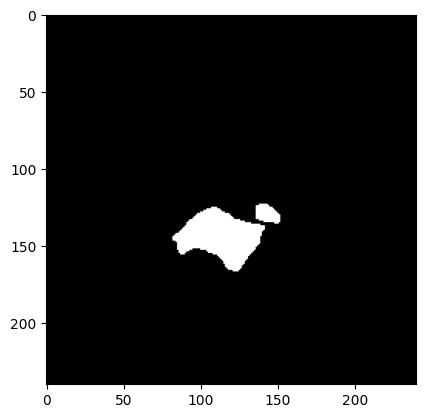

In [30]:
plot_slice("/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-seg.nii.gz")

In [34]:
img = nib.load("/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-SSA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00002-000/BraTS-SSA-00002-000-seg.nii.gz").get_fdata()

In [35]:
np.unique(img)

array([0., 1., 2., 3.])

# BraTS25-MEN

In [206]:
train_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train"
train_subjects = [subject for subject in os.listdir(train_dir) if subject.startswith("BraTS")]
print(f"Number of subjects in train: {len(train_subjects)}")
train_paths = get_paths(train_dir, file_extension=".nii.gz")
train_paths = [path for path in train_paths if 'seg' not in path]
print(f"Number of training images: {len(train_paths)}")

val_dir = "/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/ASNR-MICCAI-BraTS2023-MEN-Challenge-ValidationData"
val_subjects = [subject for subject in os.listdir(val_dir) if subject.startswith("BraTS")]
print(f"Number of subjects in val: {len(val_subjects)}")
val_paths = get_paths(val_dir, file_extension=".nii.gz")
print(f"Number of validation images: {len(val_paths)}")

all_subjects = train_subjects + val_subjects
print(f"Total number of subjects: {len(all_subjects)}")
all_paths = train_paths + val_paths
print(f"Total number of images: {len(all_paths)}")

Number of subjects in train: 1000
Number of training images: 4000
Number of subjects in val: 141
Number of validation images: 564
Total number of subjects: 1141
Total number of images: 4564


In [207]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00004-000/BraTS-MEN-00004-000-t1c.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00004-000/BraTS-MEN-00004-000-t1n.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00004-000/BraTS-MEN-00004-000-t2f.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00004-000/BraTS-MEN-00004-000-t2w.nii.gz',
 '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00008-000/BraTS-MEN-00008-000-t1c.nii.gz']

In [213]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('.nii.gz', "")
    # Sample filename: "BraTS-MEN-00008-000-t1c.nii.gz"
    splits = filename.split("-")
    modality = splits[-1]
    timepoint = f"T{int(splits[-2][-1])+1}"  # last character of the second last split
    patient_id = "-".join(splits[:-2])  # join all but the last two splits
    image_id = f"BraTS25MEN_{filename}"

    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "BraTS25MEN",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'BraTS25MEN_BraTS-MEN-00004-000-t1c',
 'patient': 'BraTS-MEN-00004',
 'modality': 't1c',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/BraTS25/BraTS25-MEN/BraTS-MEN-Train/BraTS-MEN-00004-000/BraTS-MEN-00004-000-t1c.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'BraTS25MEN'}

In [214]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata/metadata_brats25men.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/4564 images.
Collected metadata for 2/4564 images.
Collected metadata for 3/4564 images.
Collected metadata for 4/4564 images.
Collected metadata for 5/4564 images.
Collected metadata for 6/4564 images.
Collected metadata for 7/4564 images.
Collected metadata for 8/4564 images.
Collected metadata for 9/4564 images.
Collected metadata for 10/4564 images.
Collected metadata for 11/4564 images.
Collected metadata for 12/4564 images.
Collected metadata for 13/4564 images.
Collected metadata for 14/4564 images.
Collected metadata for 15/4564 images.
Collected metadata for 16/4564 images.
Collected metadata for 17/4564 images.
Collected metadata for 18/4564 images.
Collected metadata for 19/4564 images.
Collected metadata for 20/4564 images.
Collected metadata for 21/4564 images.
Collected metadata for 22/4564 images.
Collected metadata for 23/4564 images.
Collected metadata for 24/4564 images.
Collected metadata for 25/4564 images.
Collected metadata for 26/4564 ima

# ISLES22

In [82]:
root_dir = "/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022"
subjects = [subject for subject in os.listdir(root_dir) if subject.startswith("sub")]
print(f"Number of subjects: {len(subjects)}")
all_paths = get_paths(root_dir, file_extension=".nii.gz")
all_paths = [path for path in all_paths if 'msk' not in path]
print(f"Number of images: {len(all_paths)}")

Number of subjects: 250
Number of images: 750


In [84]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0001/ses-0001/anat/sub-strokecase0001_ses-0001_FLAIR.nii.gz',
 '/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0001/ses-0001/dwi/sub-strokecase0001_ses-0001_adc.nii.gz',
 '/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0001/ses-0001/dwi/sub-strokecase0001_ses-0001_dwi.nii.gz',
 '/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0002/ses-0001/anat/sub-strokecase0002_ses-0001_FLAIR.nii.gz',
 '/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0002/ses-0001/dwi/sub-strokecase0002_ses-0001_adc.nii.gz']

Image shape: (128, 128, 25)


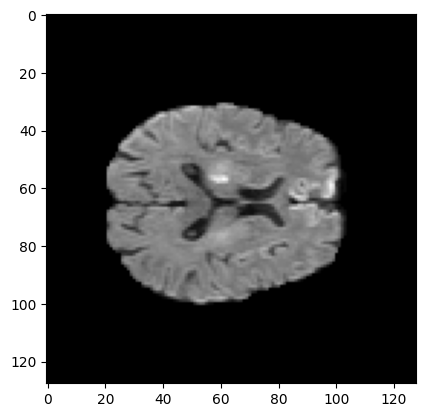

In [88]:
plot_slice(all_paths[-1])

In [94]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('.nii.gz', "")
    # Sample filename: "sub-strokecase0001_ses-0001_FLAIR.nii.gz
    splits = filename.split("_")
    patient_id = splits[0]
    modality = splits[-1]
    timepoint = f"T{splits[1][-1]}"  # last character of the second split
    image_id = f"ISLES22_{patient_id}_{timepoint}_{modality}"
    
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "ISLES22",
    }
extract_nonimage_attributes(all_paths[0])

{'image_id': 'ISLES22_sub-strokecase0001_T1_FLAIR',
 'patient': 'sub-strokecase0001',
 'modality': 'flair',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/ISLES-2022/ISLES-2022/sub-strokecase0001/ses-0001/anat/sub-strokecase0001_ses-0001_FLAIR.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'ISLES22'}

In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_isles22.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

# EPISURG

In [14]:
root_dir = "/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects"
subjects = os.listdir(root_dir)
print(f"Number of subjects: {len(subjects)}")

all_paths = get_paths(root_dir)
all_paths = [path for path in all_paths if '-seg-' not in path]
print(f"Number of images: {len(all_paths)}")

Number of subjects: 430
Number of images: 698


In [16]:
all_paths[:10]


['/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0046/postop/sub-0046_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0417/postop/sub-0417_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0176/postop/sub-0176_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0025/postop/sub-0025_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0111/postop/sub-0111_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0111/preop/sub-0111_preop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0389/postop/sub-0389_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0173/postop/sub-0173_postop-t1mri-1.nii.gz',
 '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0018/postop/

In [27]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace('nii.gz', '')
    # Example filename: sub-0046_postop-t1mri-1.nii.gz
    splits = filename.split("-")
    modality = splits[-2].replace("mri", "")
    patient_id = "-".join(splits[:-2]).split("_")[0]
    timepoint = splits[1].split("_")[-1]
    image_id = f"episurge_{patient_id}_{timepoint}_{modality}"

    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "episurge",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'episurge_sub-0046_postop_t1',
 'patient': 'sub-0046',
 'modality': 't1',
 'timepoint': 'postop',
 'image_path': '/media/storage2/share/benedichuk/unzipped_data/EPISURG/subjects/sub-0046/postop/sub-0046_postop-t1mri-1.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'episurge'}

In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_episurge.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

# IXI

In [140]:
root_dir = "/Volumes/BACH2TB/Datasets/IXI"
subdirs = [sd for sd in os.listdir(root_dir) if sd.startswith('IXI') and (not sd.endswith('.tar'))]
subdirs = [sd for sd in subdirs if "DTI" not in sd]  # Exclude DTI subdirectories
modalities = [sd.split("-")[-1] for sd in subdirs]
subdirs, modalities

(['IXI-MRA', 'IXI-PD', 'IXI-T1', 'IXI-T2'], ['MRA', 'PD', 'T1', 'T2'])

In [141]:
all_paths_dict = {
    modality: get_paths(os.path.join(root_dir, f"IXI-{modality}")) for modality in modalities
}

In [144]:
n_paths = 0
for k, v in all_paths_dict.items():
    print(k, v[0], len(v))
    n_paths += len(v)

print(f"Total {n_paths} images.")

MRA /Volumes/BACH2TB/Datasets/IXI/IXI-MRA/IXI002-Guys-0828-MRA.nii.gz 570
PD /Volumes/BACH2TB/Datasets/IXI/IXI-PD/IXI002-Guys-0828-PD.nii.gz 578
T1 /Volumes/BACH2TB/Datasets/IXI/IXI-T1/IXI002-Guys-0828-T1.nii.gz 581
T2 /Volumes/BACH2TB/Datasets/IXI/IXI-T2/IXI002-Guys-0828-T2.nii.gz 578
Total 2307 images.


In [145]:
all_paths = []
for paths in all_paths_dict.values():
    all_paths.extend(paths)

len(all_paths), all_paths[-1]


(2307, '/Volumes/BACH2TB/Datasets/IXI/IXI-T2/IXI662-Guys-1120-T2.nii.gz')

In [146]:
def extract_nonimage_attributes(image_path):
    modality = image_path.split("/")[-2].split("-")[-1].lower()

    filename = os.path.basename(image_path).replace(".nii.gz", "")
    splits = filename.split("-")
    timepoint = "T1"
    patient_id = "-".join(splits[:-1])
    
    image_id = f"ixi_{patient_id}_{timepoint}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality,
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "ixi",
    }

extract_nonimage_attributes(all_paths[-1])

{'image_id': 'ixi_IXI662-Guys-1120_T1_t2',
 'patient': 'IXI662-Guys-1120',
 'modality': 't2',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/IXI/IXI-T2/IXI662-Guys-1120-T2.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'ixi'}

In [148]:
# Corruped file: '/Volumes/BACH2TB/Datasets/IXI/IXI-MRA/IXI371-IOP-0970-MRA.nii.gz'
corrupted_file = '/Volumes/BACH2TB/Datasets/IXI/IXI-MRA/IXI371-IOP-0970-MRA.nii.gz'
if corrupted_file in all_paths:
    all_paths.remove(corrupted_file)
    print(f"Removed corrupted file: {corrupted_file}")

Removed corrupted file: /Volumes/BACH2TB/Datasets/IXI/IXI-MRA/IXI371-IOP-0970-MRA.nii.gz


In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_ixi.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/1989 images.
Collected metadata for 2/1989 images.
Collected metadata for 3/1989 images.
Collected metadata for 4/1989 images.
Collected metadata for 5/1989 images.
Collected metadata for 6/1989 images.
Collected metadata for 7/1989 images.
Collected metadata for 8/1989 images.
Collected metadata for 9/1989 images.
Collected metadata for 10/1989 images.
Collected metadata for 11/1989 images.
Collected metadata for 12/1989 images.
Collected metadata for 13/1989 images.
Collected metadata for 14/1989 images.
Collected metadata for 15/1989 images.
Collected metadata for 16/1989 images.
Collected metadata for 17/1989 images.
Collected metadata for 18/1989 images.
Collected metadata for 19/1989 images.
Collected metadata for 20/1989 images.
Collected metadata for 21/1989 images.
Collected metadata for 22/1989 images.
Collected metadata for 23/1989 images.
Collected metadata for 24/1989 images.
Collected metadata for 25/1989 images.
Collected metadata for 26/1989 ima

# BDSG

In [4]:
root_dir = "/Volumes/BACH2TB/Datasets/BGSP/orig_bids"
subjects = os.listdir(root_dir)
print(f"Number of subjects: {len(subjects)}")

Number of subjects: 231


Image shape: (192, 192, 144)


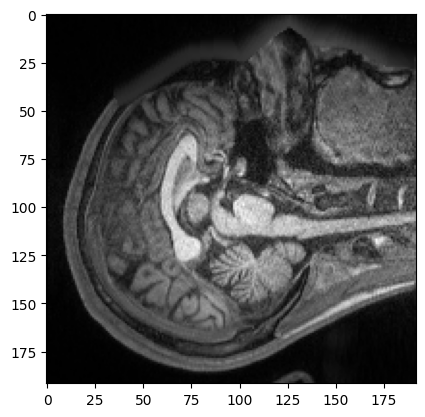

In [3]:
img_path = "/Volumes/BACH2TB/Datasets/BGSP/orig_bids/sub-1250/ses-01/anat/sub-1250_ses-01_T1w.nii.gz"
plot_slice(image_path=img_path)

# OASIS-2

In [149]:
root_dir1 = "/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART1"
root_dir2 = "/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2"

def count_files_oasis2(root_dir):
    sessions = os.listdir(root_dir)
    subjects = list(set(["_".join(ses.split("_")[:-1]) for ses in sessions]))
    return sessions, subjects

In [150]:
sessions1, subjects1 = count_files_oasis2(root_dir1)
n_sessions1 = len(sessions1)
n_subjects1 = len(subjects1)
print(f"There are {n_sessions1} sessions and {n_subjects1} subjects in part 1.")

sessions2, subjects2 = count_files_oasis2(root_dir2)
n_sessions2 = len(sessions2)
n_subjects2 = len(subjects2)
print(f"There are {n_sessions2} sessions and {n_subjects2} subjects in part 2.")

print(f"Total sessions: {n_sessions1+n_sessions2}, total subjects: {n_subjects1+n_subjects2}")

There are 209 sessions and 82 subjects in part 1.
There are 164 sessions and 68 subjects in part 2.
Total sessions: 373, total subjects: 150


In [160]:
paths1 = get_paths(root_dir1, file_extension_list=[".hdr", ".nii.gz", ".nii"])
paths2 = get_paths(root_dir2, file_extension_list=[".hdr", ".nii.gz", ".nii"])
all_paths = paths1 + paths2
all_paths = [path for path in all_paths if 'mpr-1.nifti.hdr'in path]
print(f"There are {len(paths1)} images in part 1, {len(paths2)} images in part 2.")
print(f"There are {len(all_paths)} images in total.")

There are 772 images in part 1, 596 images in part 2.
There are 373 images in total.


In [161]:
all_paths[-5:]

['/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0185_MR2/RAW/mpr-1.nifti.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0185_MR3/RAW/mpr-1.nifti.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0186_MR1/RAW/mpr-1.nifti.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0186_MR2/RAW/mpr-1.nifti.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0186_MR3/RAW/mpr-1.nifti.hdr']

In [163]:
def extract_nonimage_attributes(image_path):
    # Example of image_path: '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART2/OAS2_0186_MR3/RAW/mpr-3.nifti.hdr'
    splits = image_path.split("/")
    session = splits[-3]
    timepoint = f"T{session[-1]}"
    patient_id = "_".join(session.split("_")[:-1])
    modality = "t1w"
    image_id = f"OASIS2_{session}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "OASIS-2",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'OASIS2_OAS2_0001_MR1',
 'patient': 'OAS2_0001',
 'modality': 't1w',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/OASIS-2/OAS2_RAW_PART1/OAS2_0001_MR1/RAW/mpr-1.nifti.hdr',
 'preprocessed_image_path': '',
 'dataset': 'OASIS-2'}

In [164]:
len(all_paths)

373

In [165]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_oasis2.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/373 images.
Collected metadata for 2/373 images.
Collected metadata for 3/373 images.
Collected metadata for 4/373 images.
Collected metadata for 5/373 images.
Collected metadata for 6/373 images.
Collected metadata for 7/373 images.
Collected metadata for 8/373 images.
Collected metadata for 9/373 images.
Collected metadata for 10/373 images.
Collected metadata for 11/373 images.
Collected metadata for 12/373 images.
Collected metadata for 13/373 images.
Collected metadata for 14/373 images.
Collected metadata for 15/373 images.
Collected metadata for 16/373 images.
Collected metadata for 17/373 images.
Collected metadata for 18/373 images.
Collected metadata for 19/373 images.
Collected metadata for 20/373 images.
Collected metadata for 21/373 images.
Collected metadata for 22/373 images.
Collected metadata for 23/373 images.
Collected metadata for 24/373 images.
Collected metadata for 25/373 images.
Collected metadata for 26/373 images.
Collected metadata fo

In [ ]:
# The OASIS .hdr images are 4-dim, with the last one is temporal data, remove the last dim for consistency
path = "metadata/metadata_oasis2.csv"
df = pd.read_csv(path)
print(f"BEFORE - Unique values of shape OASIS-2: {df['shape'].unique()}")
print(f"BEFORE - Unique values of voxel spacing OASIS-2: {df['voxel_spacing'].unique()}")

def parse_tuple_string(string):
    """Parse string that look like tuple to tuple"""
    if isinstance(string, str):
        return tuple(map(float, string.strip("()").split(",")))
    return string

def remove_last_dim(string):
    tp = parse_tuple_string(string)
    return tp[:-1]

df['shape'] = df['shape'].apply(remove_last_dim)
df['voxel_spacing'] = df['voxel_spacing'].apply(remove_last_dim)
print(f"AFTER - Unique values of shape OASIS-2: {df['shape'].unique()}")
print(f"AFTER - Unique values of voxel spacing OASIS-2: {df['voxel_spacing'].unique()}")

# df.to_csv(path, index=False)
# print(f"Saved parsed metadata to {path}")

BEFORE - Unique values of shape OASIS-2: ['(256, 256, 128, 1)']
BEFORE - Unique values of voxel spacing OASIS-2: ['(1.0, 1.0, 1.25, 0.0)']
AFTER - Unique values of shape OASIS-2: [(256.0, 256.0, 128.0)]
AFTER - Unique values of voxel spacing OASIS-2: [(1.0, 1.0, 1.25)]
Saved parsed metadata to metadata/metadata_oasis2.csv


# OASIS-1

In [169]:
root_dir = "/Volumes/BACH2TB/Datasets/OASIS-1"
disc_dirs = [os.path.join(root_dir, subdir) for subdir in os.listdir(root_dir) if subdir.startswith('disc')]
disc_dirs

['/Volumes/BACH2TB/Datasets/OASIS-1/disc1',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc10',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc11',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc12',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc2',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc3',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc4',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc5',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc6',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc7',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc8',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc9']

In [176]:
n_subjects = 0
for disc_dir in disc_dirs:
    subjects = [subdir for subdir in os.listdir(disc_dir) if subdir.startswith('OAS')]
    #subjects = [subdir for subdir in subjects if 'MR1' in subdir]
    n_subjects += len(subjects)
    print(f"Number of subjects in {disc_dir}: {len(subjects)}")
print(f"Total number of subjects in OASIS-1: {n_subjects}")

Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc1: 39
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc10: 35
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc11: 34
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc12: 36
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc2: 38
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc3: 36
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc4: 35
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc5: 38
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc6: 37
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc7: 38
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc8: 35
Number of subjects in /Volumes/BACH2TB/Datasets/OASIS-1/disc9: 35
Total number of subjects in OASIS-1: 436


In [177]:
def count_files_oasis1(root_dir):
    sessions = os.listdir(root_dir)
    sessions = [ses for ses in sessions if ses.startswith('OAS1')]
    subjects = list(set(["_".join(ses.split("_")[:-1]) for ses in sessions]))
    subjects = [sub for sub in subjects if sub.startswith('OAS1')]
    
    return sessions, subjects

In [178]:
all_sessions = []
all_subjects = []

for i, disc_dir in enumerate(disc_dirs):
    sessions, subjects = count_files_oasis1(disc_dir)
    sessions = list(set(sessions))
    subjects = list(set(subjects))

    all_sessions.extend(sessions)
    all_subjects.extend(subjects)

    
print(f"Total sessions: {len(all_sessions)}, total subjects: {len(all_subjects)}")

Total sessions: 436, total subjects: 417


In [184]:
all_paths = []
for disc_dir in disc_dirs:
    paths = get_paths(disc_dir, file_extension=".hdr")
    paths = [path for path in paths if 'RAW' in path] # only keep RAW images
    paths = [path for path in paths if '_mpr-1_' in path] # only keep mpr-1 images
    all_paths.extend(paths)

print(f"Total number of images: {len(all_paths)}")

Total number of images: 436


In [183]:
all_paths[:10]

['/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0001_MR1/RAW/OAS1_0001_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0002_MR1/RAW/OAS1_0002_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0003_MR1/RAW/OAS1_0003_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0004_MR1/RAW/OAS1_0004_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0005_MR1/RAW/OAS1_0005_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0006_MR1/RAW/OAS1_0006_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0007_MR1/RAW/OAS1_0007_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0009_MR1/RAW/OAS1_0009_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0010_MR1/RAW/OAS1_0010_MR1_mpr-1_anon.hdr',
 '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0011_MR1/RAW/OAS1_0011_MR1_mpr-1_anon.hdr']

In [186]:
def extract_nonimage_attributes(image_path):
    # Example of image_path: '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0011_MR1/RAW/OAS1_0011_MR1_mpr-1_anon.hdr'
    splits = image_path.split("/")
    session = splits[-3]
    timepoint = f"T{session[-1]}"
    patient_id = "_".join(session.split("_")[:-1])
    modality = "t1w"
    image_id = f"OASIS1_{session}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "OASIS-1",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'OASIS1_OAS1_0001_MR1',
 'patient': 'OAS1_0001',
 'modality': 't1w',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/OASIS-1/disc1/OAS1_0001_MR1/RAW/OAS1_0001_MR1_mpr-1_anon.hdr',
 'preprocessed_image_path': '',
 'dataset': 'OASIS-1'}

In [187]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata/metadata_oasis1.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/436 images.
Collected metadata for 2/436 images.
Collected metadata for 3/436 images.
Collected metadata for 4/436 images.
Collected metadata for 5/436 images.
Collected metadata for 6/436 images.
Collected metadata for 7/436 images.
Collected metadata for 8/436 images.
Collected metadata for 9/436 images.
Collected metadata for 10/436 images.
Collected metadata for 11/436 images.
Collected metadata for 12/436 images.
Collected metadata for 13/436 images.
Collected metadata for 14/436 images.
Collected metadata for 15/436 images.
Collected metadata for 16/436 images.
Collected metadata for 17/436 images.
Collected metadata for 18/436 images.
Collected metadata for 19/436 images.
Collected metadata for 20/436 images.
Collected metadata for 21/436 images.
Collected metadata for 22/436 images.
Collected metadata for 23/436 images.
Collected metadata for 24/436 images.
Collected metadata for 25/436 images.
Collected metadata for 26/436 images.
Collected metadata fo

In [188]:
# The OASIS .hdr images are 4-dim, with the last one is temporal data, remove the last dim for consistency
path = "metadata/metadata_oasis1.csv"
df = pd.read_csv(path)
print(f"BEFORE - Unique values of shape OASIS-1: {df['shape'].unique()}")
print(f"BEFORE - Unique values of voxel spacing OASIS-1: {df['voxel_spacing'].unique()}")

def parse_tuple_string(string):
    """Parse string that look like tuple to tuple"""
    if isinstance(string, str):
        return tuple(map(float, string.strip("()").split(",")))
    return string

def remove_last_dim(string):
    tp = parse_tuple_string(string)
    return tp[:-1]

df['shape'] = df['shape'].apply(remove_last_dim)
df['voxel_spacing'] = df['voxel_spacing'].apply(remove_last_dim)
print(f"AFTER - Unique values of shape OASIS-1: {df['shape'].unique()}")
print(f"AFTER - Unique values of voxel spacing OASIS-1: {df['voxel_spacing'].unique()}")

df.to_csv(path, index=False)
print(f"Saved parsed metadata to {path}")

BEFORE - Unique values of shape OASIS-1: ['(256, 256, 128, 1)']
BEFORE - Unique values of voxel spacing OASIS-1: ['(1.0, 1.0, 1.25, 0.0)']
AFTER - Unique values of shape OASIS-1: [(256.0, 256.0, 128.0)]
AFTER - Unique values of voxel spacing OASIS-1: [(1.0, 1.0, 1.25)]
Saved parsed metadata to metadata/metadata_oasis1.csv


# umf-pd

In [130]:
root_dir = "/Volumes/BACH2TB/Datasets/umf_pd"

nc_subdir = "/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon"
nc_subjects = [sd for sd in os.listdir(nc_subdir) if sd.startswith("sub")]
print(f"Number of subjects in neurocon: {len(nc_subjects)}")

taowu_subdir = "/Volumes/BACH2TB/Datasets/umf_pd/taowu.tar/taowu"
taowu_subjects = [sd for sd in os.listdir(taowu_subdir) if sd.startswith("sub")]
print(f"Number of subjects in taowu: {len(taowu_subjects)}")

all_paths = get_paths(root_dir, file_extension=".nii.gz")
all_paths = [path for path in all_paths if '/anat/' in path]
print(f"Number of images: {len(all_paths)}")

Number of subjects in neurocon: 43
Number of subjects in taowu: 40
Number of images: 83


In [132]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032014/anat/sub-control032014_T1w.nii.gz',
 '/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032015/anat/sub-control032015_T1w.nii.gz',
 '/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032016/anat/sub-control032016_T1w.nii.gz',
 '/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032017/anat/sub-control032017_T1w.nii.gz',
 '/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032018/anat/sub-control032018_T1w.nii.gz']

In [138]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace(".nii.gz", "")
    splits = filename.split("_")
    modality = splits[-1].lower()
    timepoint = "T1"  
    patient_id = splits[0]
    image_id = f"UMFPD_{patient_id}_{timepoint}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "UMFPD",
    }

extract_nonimage_attributes(all_paths[0])

{'image_id': 'UMFPD_sub-control032014_T1_t1w',
 'patient': 'sub-control032014',
 'modality': 't1w',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/umf_pd/neurocon.tar/neurocon/sub-control032014/anat/sub-control032014_T1w.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'UMFPD'}

In [139]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata_umfpd.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/83 images.
Collected metadata for 2/83 images.
Collected metadata for 3/83 images.
Collected metadata for 4/83 images.
Collected metadata for 5/83 images.
Collected metadata for 6/83 images.
Collected metadata for 7/83 images.
Collected metadata for 8/83 images.
Collected metadata for 9/83 images.
Collected metadata for 10/83 images.
Collected metadata for 11/83 images.
Collected metadata for 12/83 images.
Collected metadata for 13/83 images.
Collected metadata for 14/83 images.
Collected metadata for 15/83 images.
Collected metadata for 16/83 images.
Collected metadata for 17/83 images.
Collected metadata for 18/83 images.
Collected metadata for 19/83 images.
Collected metadata for 20/83 images.
Collected metadata for 21/83 images.
Collected metadata for 22/83 images.
Collected metadata for 23/83 images.
Collected metadata for 24/83 images.
Collected metadata for 25/83 images.
Collected metadata for 26/83 images.
Collected metadata for 27/83 images.
Collected 

# NFBS

In [197]:
root_dir = "/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/"
subjects = [sd for sd in os.listdir(root_dir) if sd.startswith("A00")]
print(f"Number of subjects: {len(subjects)}")

all_paths = get_paths(root_dir, file_extension=".nii.gz")
all_paths = [path for path in all_paths if 'brain.nii.gz' in path] # only get the skull-stripped brain images
print(f"Number of images: {len(all_paths)}")

Number of subjects: 125
Number of images: 125


In [198]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brain.nii.gz',
 '/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00028352/sub-A00028352_ses-NFB3_T1w_brain.nii.gz',
 '/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00032875/sub-A00032875_ses-NFB3_T1w_brain.nii.gz',
 '/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00033747/sub-A00033747_ses-NFB3_T1w_brain.nii.gz',
 '/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00034854/sub-A00034854_ses-NFB3_T1w_brain.nii.gz']

In [203]:
def extract_nonimage_attributes(image_path):
    filename = os.path.basename(image_path).replace(".nii.gz", "")
    splits = filename.split("_")
    patient_id = "_".join(splits[:2])
    timepoint = "T1"  # Assuming all images are T1-weighted
    modality = "t1w"
    image_id = f"NFBS_{patient_id}_{timepoint}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "NFBS",
    }
extract_nonimage_attributes(all_paths[0])

{'image_id': 'NFBS_sub-A00028185_ses-NFB3_T1_t1w',
 'patient': 'sub-A00028185_ses-NFB3',
 'modality': 't1w',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/NFBS/NFBS_Dataset.tar/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brain.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'NFBS'}

In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata/metadata_nfbs.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)

Collected metadata for 1/125 images.
Collected metadata for 2/125 images.
Collected metadata for 3/125 images.
Collected metadata for 4/125 images.
Collected metadata for 5/125 images.
Collected metadata for 6/125 images.
Collected metadata for 7/125 images.
Collected metadata for 8/125 images.
Collected metadata for 9/125 images.
Collected metadata for 10/125 images.
Collected metadata for 11/125 images.
Collected metadata for 12/125 images.
Collected metadata for 13/125 images.
Collected metadata for 14/125 images.
Collected metadata for 15/125 images.
Collected metadata for 16/125 images.
Collected metadata for 17/125 images.
Collected metadata for 18/125 images.
Collected metadata for 19/125 images.
Collected metadata for 20/125 images.
Collected metadata for 21/125 images.
Collected metadata for 22/125 images.
Collected metadata for 23/125 images.
Collected metadata for 24/125 images.
Collected metadata for 25/125 images.
Collected metadata for 26/125 images.
Collected metadata fo

# BrainMetShare

In [216]:
train_dir = "/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train"
train_subjects = [subject for subject in os.listdir(train_dir) if subject.startswith("Met")]
print(f"Number of subjects in train: {len(train_subjects)}")

train_paths = get_paths(train_dir, file_extension=".nii.gz")
train_paths = [path for path in train_paths if 'seg' not in path]
print(f"Number of training images: {len(train_paths)}")

val_dir = "/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/test"
val_subjects = [subject for subject in os.listdir(val_dir) if subject.startswith("Met")]
print(f"Number of subjects in val: {len(val_subjects)}")
val_paths = get_paths(val_dir, file_extension=".nii.gz")
print(f"Number of validation images: {len(val_paths)}")

all_subjects = train_subjects + val_subjects
print(f"Total number of subjects: {len(all_subjects)}")
all_paths = train_paths + val_paths
print(f"Total number of images: {len(all_paths)}")

Number of subjects in train: 105
Number of training images: 420
Number of subjects in val: 51
Number of validation images: 204
Total number of subjects: 156
Total number of images: 624


In [217]:
all_paths[:5]

['/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train/Mets_005/bravo.nii.gz',
 '/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train/Mets_005/flair.nii.gz',
 '/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train/Mets_005/t1_gd.nii.gz',
 '/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train/Mets_005/t1_pre.nii.gz',
 '/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/train/Mets_010/bravo.nii.gz']

In [223]:
def extract_nonimage_attributes(image_path):
    modality = os.path.basename(image_path).replace('.nii.gz', "").replace("_", "")
    splits = image_path.split("/")
    patient_id = splits[-2]
    timepoint = "T1"
    image_id = f"BrainMetShare_{patient_id}_{modality}"
    return {
        "image_id": image_id,
        "patient": patient_id,
        "modality": modality.lower(),
        "timepoint": timepoint,
        "image_path": image_path,
        "preprocessed_image_path": "",
        "dataset": "BrainMetShare",
    }

extract_nonimage_attributes(all_paths[-10])

{'image_id': 'BrainMetShare_Mets_318_t1gd',
 'patient': 'Mets_318',
 'modality': 't1gd',
 'timepoint': 'T1',
 'image_path': '/Volumes/BACH2TB/Datasets/BrainMetShare/brainmetshare-3/test/Mets_318/t1_gd.nii.gz',
 'preprocessed_image_path': '',
 'dataset': 'BrainMetShare'}

In [ ]:
collect_metadata(
    image_paths=all_paths,
    csv_file="metadata/metadata_brainmetshare.csv",
    extract_nonimage_attributes_fn=extract_nonimage_attributes
)